In [152]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd

In [153]:
df = pd.read_excel('itService.xlsx')

x_data = df[['YY','MM']]
t_data = df['CNT']

print(x_data.shape)
print(t_data.shape)


(104, 2)
(104,)


In [154]:
# 모델 구축
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='linear'))

In [155]:
# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                96        
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [156]:
#모델 학습
hist = model.fit(x_data, t_data, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 4727789825627315821871104.0000
Epoch 2/100
4/4 [==============================] - 0s 668us/step - loss: inf                             
Epoch 3/100
4/4 [==============================] - 0s 667us/step - loss: inf
Epoch 4/100
4/4 [==============================] - 0s 668us/step - loss: nan
Epoch 5/100
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 6/100
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 7/100
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 8/100
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 9/100
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 10/100
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 11/100
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 12/100
4/4 [==============================] - 0s 667us/step - loss: nan
Epoch 13/100
4/4 [=

In [157]:
df_pred = pd.DataFrame({'YY':[2022],
                             'MM':[1],
                            })
df_pred

,YY,MM
0,2022,1


In [158]:
prediction_val = model.predict(df_pred)
prediction_val

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]], dtype=float32)

In [159]:
print(model.input)
print(model.output)
print(model.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name='dense_14_input'), name='dense_14_input', description="created by layer 'dense_14_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='dense_14/BiasAdd:0', description="created by layer 'dense_14'")
[<tf.Variable 'dense_14/kernel:0' shape=(2, 32) dtype=float32, numpy=
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]], dtype=float32)>, <tf.Variable 'dense_14/bias:0' shape=(32,) dtype=float32, numpy=
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, n

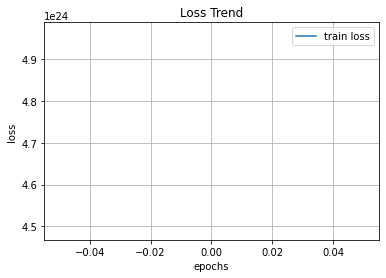

In [160]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
##  hist.history["loss"] 자동 저장
plt.plot(hist.history["loss"], label="train loss")
plt.legend(loc="best")

plt.show()